In [16]:
import numpy as np
import pandas as pd
import requests
import tweepy
from tweepy import OAuthHandler
import json
import matplotlib.pyplot as plt
import seaborn as sb
% matplotlib inline

## Gathering
#### Data Sources:
- 1. enhanced WeRateDogs Twitter archive: twitter_archive_enhanced.csv
- 2. tweet image predictions: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
- 3. use Tweepy to query Tweeter API for tweets' JSON data

**Data Source 1**

In [17]:
# load twitter_archive_enhanced.csv
df_arc = pd.read_csv('twitter-archive-enhanced.csv')

**Data Source 2**

In [18]:
# get the Tweet image predictions data 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
# write data into a file named image-predictions.tsv
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

In [19]:
# load image-predictions.tsv
df_pre = pd.read_csv('image-predictions.tsv', sep = '\t')

**Data Source 3**

In [ ]:
# query Twitter API for each tweet in the Twitter archive
# save JSON in a text file
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_arc['tweet_id'].values
len(tweet_ids)

count = 0
fails_dict = {}
with open('tweet-json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass

print(fails_dict)

In [20]:
# 
# read tweet ID, retweet count, favorite count into a dictionary
# append dictionaries to a list
# convert the list into a dataframe
dict_list = []

with open('tweet-json.txt') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_n = tweet['retweet_count']
        fav_n = tweet['favorite_count']
        dict_ = {'tweet_id': tweet_id, 'retweet_count': int(retweet_n), 'favorite_count': int(fav_n)}
        dict_list.append(dict_)

df_metrics = pd.DataFrame(dict_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

#### Gathering Summary
Now I gather data and load into 3 dataframes:
- df_arc (enhanced WeRateDogs Twitter archive)
- df_pre (tweet image predictions)
- df_metrics (tweet ID, retweet count, favorite count for tweet_id in df_arc)

## Assessing

### 1. Assess df_arc

In [21]:
df_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**Quality Issue 1** `extraneous columns (e.g. retweeted_status_id)`

**Tidiness Issue 1** `column headers are values of dog stage (e.g. doggo)`

In [22]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**Quality Issue 2** `tweet_id is an integer not a string`

**Quality Issue 3** `null values in some columns`

In [23]:
# check datatype of timestamp
type(df_arc.timestamp[0])

str

**Quality Issue 4** `timestamp is a str not in datetime format`

In [24]:
# check duplicated record
df_arc.duplicated().sum()

0

In [25]:
# check duplicated tweet_id
df_arc['tweet_id'].duplicated().any()

False

`Note`: We only want original posts, no retweets. In the summary table above, 181 non-null values for all three retweeted columns

In [26]:
# check a sample of retweeted_status_id values
df_arc.retweeted_status_id.unique()[:5]
# there are retweets

array([             nan,   8.87473957e+17,   8.86053734e+17,
         8.30583321e+17,   8.78057613e+17])

**Quality Issue 5** `retweets instead of original posts`

In [27]:
# check the values under name column
df_arc.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Cooper           11
Lucy             11
Lola             10
Tucker           10
Penny            10
Winston           9
Bo                9
Sadie             8
the               8
Daisy             7
an                7
Buddy             7
Bailey            7
Toby              7
Milo              6
Oscar             6
Koda              6
Rusty             6
Dave              6
Stanley           6
Bella             6
Jax               6
Scout             6
Jack              6
Leo               6
Bentley           5
               ... 
Severus           1
Alexanderson      1
Harrison          1
Kuyu              1
William           1
Brandy            1
Tess              1
Monkey            1
Stewie            1
Timofy            1
Jangle            1
Brandonald        1
Dot               1
his               1
Deacon            1
Zeus              1
Joey              1
Strider           1
Kirk              1


**Quality Issue 6** `huge number of missing value (None) in name column`

**Quality Issue 7** `incorrect data input in name column (e.g. an, the, a)`

`Note`: according to [WeRateDog Wikipage](https://en.wikipedia.org/wiki/WeRateDogs), the rating denominator is always 10

In [28]:
# check if exists value in rating_denominator column not equal to 10
df_arc[df_arc.rating_denominator != 10].count()

tweet_id                      23
in_reply_to_status_id          5
in_reply_to_user_id            5
timestamp                     23
source                        23
text                          23
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                 19
rating_numerator              23
rating_denominator            23
name                          23
doggo                         23
floofer                       23
pupper                        23
puppo                         23
dtype: int64

**Quality Issue 8** `rating_denominator different from 10`

In [29]:
# check the values for dog stage columns
dog_stages = ['doggo', 'floofer', 'pupper', 'puppo', ]
for _ in dog_stages:
    print(df_arc[_].value_counts(), '\n')

None     2259
doggo      97
Name: doggo, dtype: int64 

None       2346
floofer      10
Name: floofer, dtype: int64 

None      2099
pupper     257
Name: pupper, dtype: int64 

None     2326
puppo      30
Name: puppo, dtype: int64 



Now I check if there exists multiple dog stages under the same tweet_id. First I decide to check the occurrence of both doggo and pupper. 

In [30]:
# first check occurence of both doggo and pupper
doggo_pupper = df_arc.query('doggo != "None" and pupper != "None"')
len(doggo_pupper)

12

**Note** Luckily, but just one trial, I already found that there actually exists multiple stages in the same tweet_id. It is reasonable to assume there are occurrences of other dog stage combination, but one successful trial is enough to show the quality issue. 

**Quality Issue 9** `records with multiple dog stages`

### 2. Assess df_pre

In [31]:
df_pre.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [32]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**Quality Issue 1** `tweet_id is an interger not a string`

In [33]:
# check duplicated record
df_pre.duplicated().sum()

0

In [34]:
# check number of unique tweet_id
df_pre.tweet_id.nunique()

2075

`Note`: we only want posts with image. In df_pre, there's image for every unqiue tweet_id.

In [35]:
# check number of unique tweet_id in df_arc
df_arc.tweet_id.nunique()
# the difference in number is the number of corresponding posts 
# without image data in df_arc

2356

**Quality Issue 10 (in df_arc)** `there are ratings without image`

**Tidiness Issue 1** `retweet_count and favorite_count are in separate dataframe`

`Note`: the data in df_pre should've been in the df_arc depicting information about each post, as 1 type of observation

### Assess df_metrics

In [36]:
df_metrics.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [37]:
df_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


**Quality Issue 1** `tweet_id is an interger not a string`

In [38]:
# check the number of tweet_id for df_arc
df_arc.tweet_id.count()
# the number of tweet_id for df_metrics is 2 less, this is not a quality issue,
# but failure to retrive data probably because the posts with corresponding ids 
# may have been deleted.

2356

**Tidiness Issue 1** `retweet_count and favorite_count are in separate dataframe`

`Note`: retweet_count and favorite_count are two columns that should've been in the df_arc depicting basic information about each post, as 1 type of observation

## Assessment Summary
### 1. df_arc 
**Quality**
- extraneous columns (e.g. retweeted_status_id)
- tweet_id is an integer not a string
- null values in some columns 
- timestamp is a str not in datetime format
- retweets instead of original posts
- huge number of missing value (None) in name column
- incorrect data input in name column (e.g. an, the, a)
- rating_denominator different from 10
- records with multiple dog stages
- there are ratings without image

**Tidiness**
- column headers are values of dog stage (e.g. doggo)

### 2. df_pre
**Quality**
- tweet_id is an interger not a string

**Tidiness**
- retweet_count and favorite_count are in separate dataframe

### 3. df_metrics
**Quality**
- tweet_id is an interger not a string

**Tidiness**
- retweet_count and favorite_count are in separate dataframe

## Cleaning

### 1. df_arc 

In [160]:
# make a copy before proceeding
df1 = df_arc.copy()

#### Quality

**Define Solution for Issue 1**: drop extraneous columns

In [161]:
drop_columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'text', 'expanded_urls']
df1.drop(columns = drop_columns, inplace = True)

**Test**

In [162]:
# verify extraneous columns are dropped
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 221.0+ KB


**Define Solution Issue 2**: convert tweet_id from integer to string

In [163]:
# use astype() to convert
df1.tweet_id = df1.tweet_id.astype(str)

**Test**

In [164]:
# check the datatype of tweet_id
type(df1.tweet_id[0])

str

**`Note` for Issue 3**: null values only in retweet columns. Keep them for now, because they are useful in handling **Issue 5**

**Define Solution Issue 4**: convert timestamp to datetime format

In [165]:
# use to_datetime() to convert
df1.timestamp = pd.to_datetime(df1.timestamp)

**Test**

In [166]:
# check its datatype
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id                      2356 non-null object
timestamp                     2356 non-null datetime64[ns]
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 221.0+ KB


**Define Solution Issue 5**: filter rows with null values in retweet columns

In [167]:
# get all the records with null values in retweeted_status_id
df1 = df1[df1.retweeted_status_id.isnull()]

**Test**

In [168]:
# check the number of non-null values in retweeted columns
df1.info()
# all 3 retweeted columns have no non-null values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id                      2175 non-null object
timestamp                     2175 non-null datetime64[ns]
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 220.9+ KB


**Define Solution Issue 3**: drop 3 retweeted columns

In [169]:
# drop retweeted columns since they're no longer useful
retweet_cols = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df1.drop(columns = retweet_cols, inplace = True)

**Test**

In [170]:
# check 
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 169.9+ KB


**Define Solution Issue 6 & 7**: drop name column because pet names don't seem to offer much depth for my analysis

In [171]:
# drop name column
df1.drop(columns = 'name', inplace = True)

**Test**

In [172]:
# verify the drop
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 152.9+ KB


**Define Solution Issue 8**: drop records with denominator not equal to 10

In [173]:
# check the total number of denominator different from 10
df1[df1.rating_denominator != 10].rating_denominator.count()
# the amount is small. Dropping them won't impact data integrity

22

In [174]:
# drop records
deno_drop = df1[df1.rating_denominator != 10]
df1.drop(index = deno_drop.index, inplace = True)

**Test**

In [175]:
# check the records are dropped
(df1.rating_denominator != 10).any()

False

**Define Solution for Quality Issue 9 & Tidiness Issue 1**: define a function to unpivot the four dog stage columns and put them into a new column named dog_stage, and handle multiple stages by separating them with commas as well as handling the missing values

In [176]:
# define the function 
def merge(row):
    result = ""
    if row.doggo != "None":
        result = result + row.doggo + ","
    if row.floofer != "None":
        result = result + row.floofer + ","
    if row.pupper != "None":
        result = result + row.pupper + ","
    if row.puppo != "None":
        result = result + row.puppo + ","
    if result == "":
        result = np.nan
    else:
        result = result[:-1]
    return result

In [177]:
# create the dog_stage column with the defined merge function applied to each row
df1['dog_stage'] = df1.apply(merge, axis=1)

# drop the four dog stage columns
df1 = df1.drop(['doggo','floofer','pupper','puppo'], axis=1)

**Test**

In [178]:
# use the first few records to check the change
df1.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,dog_stage
0,892420643555336193,2017-08-01 16:23:56,13,10,NaN
1,892177421306343426,2017-08-01 00:17:27,13,10,NaN
2,891815181378084864,2017-07-31 00:18:03,12,10,NaN
3,891689557279858688,2017-07-30 15:58:51,13,10,NaN
4,891327558926688256,2017-07-29 16:00:24,12,10,NaN


`Note`because **Issue 10** involved the second dataframe df_pre, I will handle it in the next session

### 2. df_pre

In [179]:
# make a copy before proceeding
df2 = df_pre.copy()

#### Quality

**Issue 1**: convert tweet_id from integer to string

In [180]:
df2.tweet_id = df2.tweet_id.astype(str)

In [181]:
# check datatype of tweet_id 
type(df2.tweet_id[0])

str

**Define Solution for Issue 10 (in df1)**: filter tweet_id in both df1 and df2

In [182]:
# create an empty list
index_list = []
# get indexes of all records in df1 with tweet_id also in df2
for x in df1.tweet_id.tolist():
    if x in df2.tweet_id.tolist():
        id_index = df1[df1.tweet_id == x].index.values[0]
        index_list.append(id_index)

In [183]:
# filter df1 by index
df1 = df1.loc[index_list, :]

**Test**

In [184]:
# check if the the number of tweet_id in df1 matches the length of index list
df1.tweet_id.count() == len(index_list)

True

In [185]:
# get the info summary table 
info_ = df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 2355
Data columns (total 5 columns):
tweet_id              1976 non-null object
timestamp             1976 non-null datetime64[ns]
rating_numerator      1976 non-null int64
rating_denominator    1976 non-null int64
dog_stage             306 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 92.6+ KB


**Tidiness**

**Define Solution for Issue 1**: join df1 & df2

In [186]:
# inner join df1 and df2 by tweet_id key
# name the cleaned dataframe df_twitter
df_twitter = df1.merge(df2, how = 'inner', on = 'tweet_id')

**Test**

In [187]:
# check the merge
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 16 columns):
tweet_id              1976 non-null object
timestamp             1976 non-null datetime64[ns]
rating_numerator      1976 non-null int64
rating_denominator    1976 non-null int64
dog_stage             306 non-null object
jpg_url               1976 non-null object
img_num               1976 non-null int64
p1                    1976 non-null object
p1_conf               1976 non-null float64
p1_dog                1976 non-null bool
p2                    1976 non-null object
p2_conf               1976 non-null float64
p2_dog                1976 non-null bool
p3                    1976 non-null object
p3_conf               1976 non-null float64
p3_dog                1976 non-null bool
dtypes: bool(3), datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 221.9+ KB


### 3. df_metrics

In [188]:
# make a copy before proceeding
df3 = df_metrics.copy()

**Quality**

**Define Solution for Issue**: convert tweet_id from int to str

In [189]:
# convert the datatype of tweet_id to string
df3.tweet_id = df3.tweet_id.astype(str)

**Test**

In [190]:
# check 
type(df3.tweet_id[0])

str

**Tidiness**

**Define Solution for Issue**: join df3 and df_twitter

In [191]:
# display a sample of df3
df3.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


In [192]:
# inner join df3 and df_twitter by tweet_id key
# name the cleaned dataframe df_twitter
df_twitter = df_twitter.merge(df3, how = 'inner', on = 'tweet_id')

**Test**

In [193]:
# check
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 18 columns):
tweet_id              1976 non-null object
timestamp             1976 non-null datetime64[ns]
rating_numerator      1976 non-null int64
rating_denominator    1976 non-null int64
dog_stage             306 non-null object
jpg_url               1976 non-null object
img_num               1976 non-null int64
p1                    1976 non-null object
p1_conf               1976 non-null float64
p1_dog                1976 non-null bool
p2                    1976 non-null object
p2_conf               1976 non-null float64
p2_dog                1976 non-null bool
p3                    1976 non-null object
p3_conf               1976 non-null float64
p3_dog                1976 non-null bool
retweet_count         1976 non-null int64
favorite_count        1976 non-null int64
dtypes: bool(3), datetime64[ns](1), float64(3), int64(5), object(6)
memory usage: 252.8+ KB


## Datasets after Wrangling

- `df_twitter`: tweet data including attributes and image predictions of breed

## Storing

In [194]:
# store df_twitter into a CSV file named twitter_archive_master.csv
df_twitter.to_csv('twitter_archive_master.csv', index = False)

## EDA and Visualization

In [195]:
df_twitter.head(3)

,tweet_id,timestamp,rating_numerator,rating_denominator,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,13,10,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,13,10,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,12,10,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461


**Question 1**: What stage of dogs gets the most favorites? 

In [212]:
# get average favorite counts for each dog stage in descending order
favorites = df_twitter.groupby('dog_stage').mean()['favorite_count'].sort_values(ascending = False)
favorites

dog_stage
doggo,puppo      47844.000000
puppo            21582.090909
doggo            19356.380952
doggo,floofer    17169.000000
floofer          13206.000000
doggo,pupper     12533.111111
pupper            7197.738916
Name: favorite_count, dtype: float64

In [215]:
doggo_fav = favorites['doggo,puppo'] + favorites['doggo'] + favorites['doggo,floofer'] + favorites['doggo,pupper']
puppo_fav = favorites['doggo,puppo'] + favorites['puppo']
pupper_fav = favorites['doggo,pupper'] + favorites['pupper']
floofer_fav = favorites['doggo,floofer'] + favorites['floofer']

print('doggo {}\npuppo {}\npupper {}\nfloofer {}'.format(doggo_fav, puppo_fav, pupper_fav, floofer_fav))

doggo 96902.49206349206
puppo 69426.09090909091
pupper 19730.85002736727
floofer 30375.0


**Question 2**: Does the number of images affect the prediction? 

In [198]:
# get average confidence level of first prediction for different numbers of images
df_predict.groupby('img_num').mean()['p1_conf']

img_num
1    0.572339
2    0.704029
3    0.759897
4    0.818488
Name: p1_conf, dtype: float64

**Question 3**: What are the top 5 breeds as algorithm's first prediction?

In [199]:
# get the top 5 counts of first prediction values
df_predict.p1.value_counts().nlargest(5)

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
Name: p1, dtype: int64

Text(0.5,1,'Top 5 Breeds from Algorithm’s First Prediction')

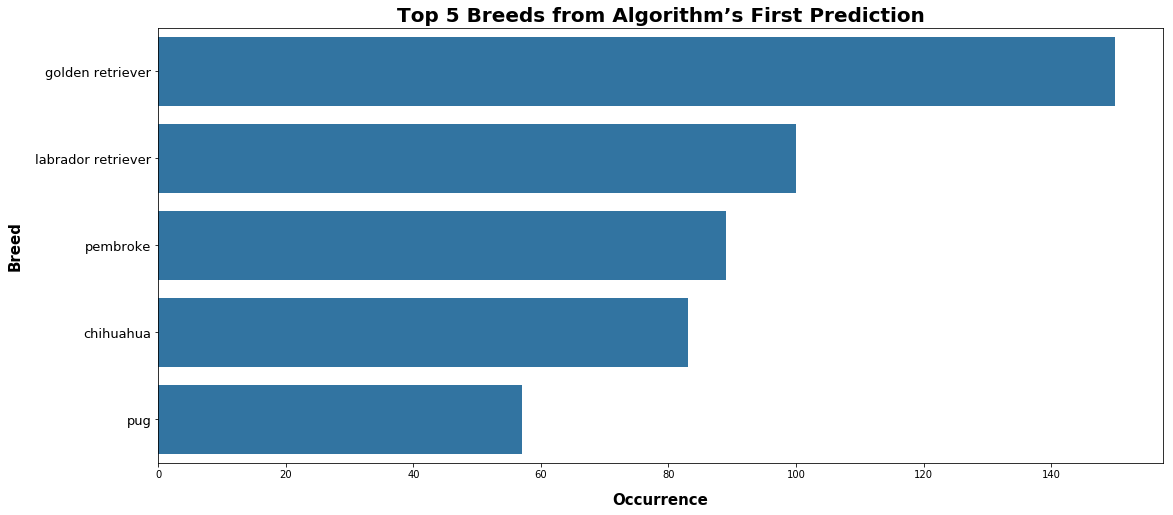

In [200]:
# plot the data in a bar chart
plt.figure(figsize=(18,8))
indeces = df_predict.p1.value_counts().nlargest(5).index
values = df_predict.p1.value_counts().nlargest(5).values
# use same color for the bars
base_color = sb.color_palette()[0]
sb.barplot(values, indeces, color = base_color)

# customize ticks, labels, and title 
plt.yticks(np.arange(5),('golden retriever', 'labrador retriever', 'pembroke', 'chihuahua', 'pug'), fontsize = 13)
plt.xlabel('Occurrence', fontweight = 'bold', fontsize = 15, labelpad = 13)
plt.ylabel('Breed', fontweight = 'bold', fontsize = 15, labelpad = 13)
plt.title('Top 5 Breeds from Algorithm’s First Prediction', fontweight = 'bold', fontsize = 20)


**Question 4**: What does the highest rating post image look like?

In [201]:
# get the row in df_twitter with highest rating_numerator 
top_rating_row = df_twitter.sort_values(by = 'rating_numerator', ascending = False).head(1)
# get the corresponding tweet_id value from the row
top_rating_id = top_rating_row.tweet_id.values

In [202]:
# use the tweet_id value to query the corresponding record in df_predict
top_record = df_predict[df_predict.tweet_id.values == top_rating_id]
# get the jpg_url from the record
top_record.jpg_url

1270    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object